In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from pandas import read_csv
import seaborn as sb
from sklearn.cluster import KMeans
import random
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, calinski_harabasz_score
%matplotlib inline

In [2]:
df = pd.read_csv("Dados_JPS_12B1.csv", sep = ',' ,decimal='.')
df.drop(columns='Unnamed: 6', inplace = True)
df.head()

,DIA,MES,ANO,HORA,MINUTO,Potencia
0,1,1,2008,0,0,7.9
1,1,1,2008,0,15,7.7
2,1,1,2008,0,30,7.7
3,1,1,2008,0,45,7.4
4,1,1,2008,1,0,7.4


In [3]:
df['Data'] = pd.to_datetime(df[['DIA','MES','ANO','HORA','MINUTO']]
                            .astype(str).apply(' '.join, 1), format='%d %m %Y %H %M')

In [4]:
df.set_index('Data', inplace=True)
df.drop(columns=['DIA','MES','ANO','HORA','MINUTO'], axis=1, inplace=True)
df.head()

,Potencia
Data,
2008-01-01 00:00:00,7.9
2008-01-01 00:15:00,7.7
2008-01-01 00:30:00,7.7
2008-01-01 00:45:00,7.4
2008-01-01 01:00:00,7.4


In [5]:
df.describe()

,Potencia
count,210432.000000
mean,12.297258
std,4.129985
min,0.000000
25%,9.200000
50%,11.300000
75%,14.900000
max,24.100000


In [6]:
df_max_2008= df['Potencia'].loc['2008']
df_max_2009= df['Potencia'].loc['2009']
df_max_2010= df['Potencia'].loc['2010']
df_max_2011= df['Potencia'].loc['2011']
df_max_2012= df['Potencia'].loc['2012']
df_max_2013= df['Potencia'].loc['2013']

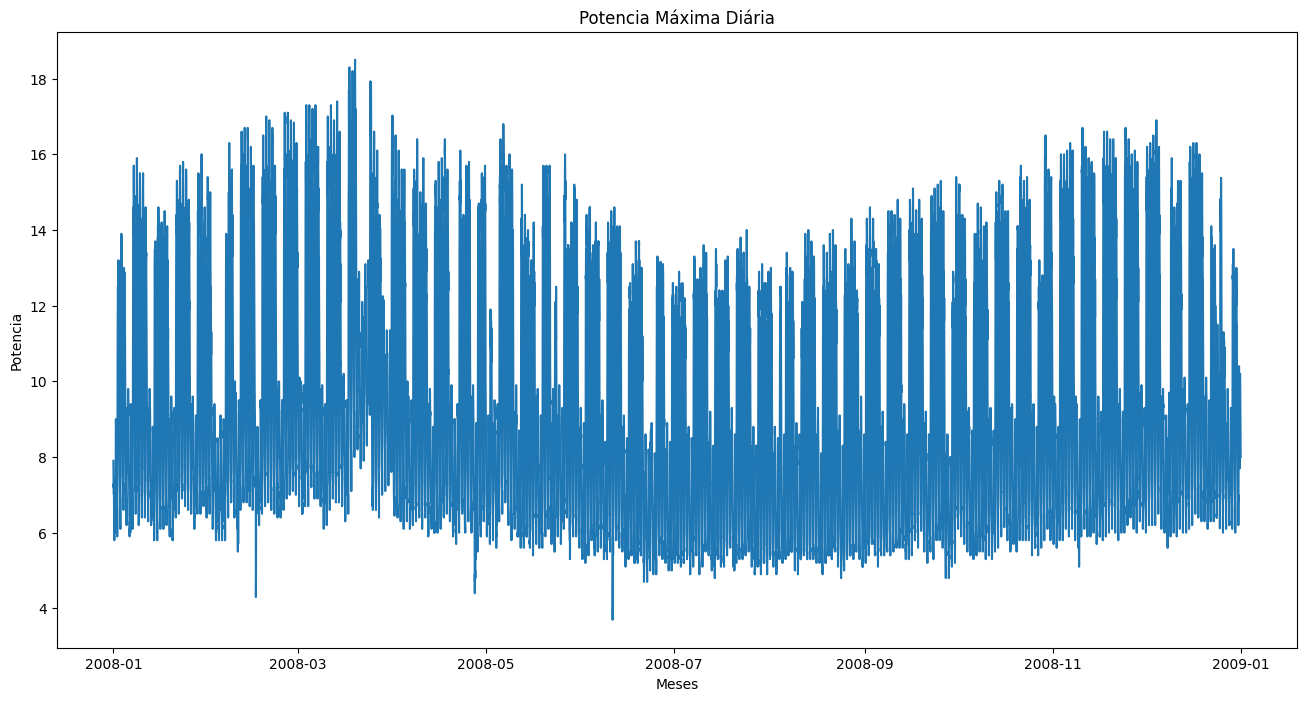

In [7]:
plt.figure(figsize=(16,8))
plt.title('Potencia Máxima Diária')
plt.xlabel('Meses')
plt.ylabel('Potencia')
plt.plot(df_max_2008)

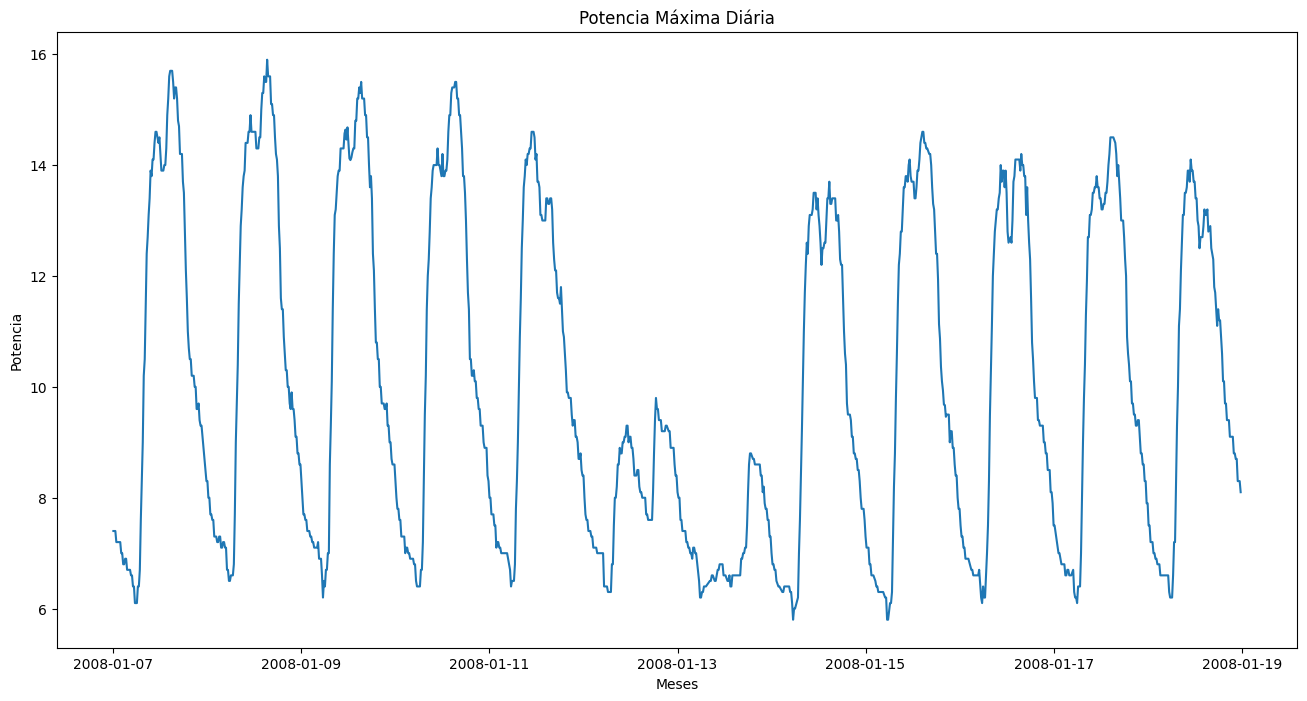

In [8]:
#dias = número de dias para plotar
dias = 18
df_max1 = df['Potencia'].iloc[576:dias*96]   
df_max2 = df['Potencia'].iloc[576:dias*96] 
plt.figure(figsize=(16,8))
plt.title('Potencia Máxima Diária')
plt.xlabel('Meses')
plt.ylabel('Potencia')
plt.plot(df_max1)

### Inserindo Outliers no periodo de 2008

In [9]:
df_max_2008.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 35136 entries, 2008-01-01 00:00:00 to 2008-12-31 23:45:00
Series name: Potencia
Non-Null Count  Dtype  
--------------  -----  
35136 non-null  float64
dtypes: float64(1)
memory usage: 549.0 KB


### Outliers min

In [10]:

N = 35136
num_outliers = int(0.02 * N)

# gerando aleatoriamente os índices das amostras de outliers
outlier_indices = random.sample(range(N), num_outliers)



In [11]:
for idx in outlier_indices:
    df_max_2008[idx] = 0

### Outliers max

In [12]:
N = 35136
num_outliers_pico = int(0.02 * N)

# gerando aleatoriamente os índices das amostras de outliers
outlier_indices_pico = random.sample(range(N), num_outliers_pico)

In [13]:
for idx in outlier_indices_pico:
    # amplitude aleatória entre 18 e 25
    amplitude = random.uniform(18, 25)
    df_max_2008[idx] = amplitude

### Plotando após inserir os outliers

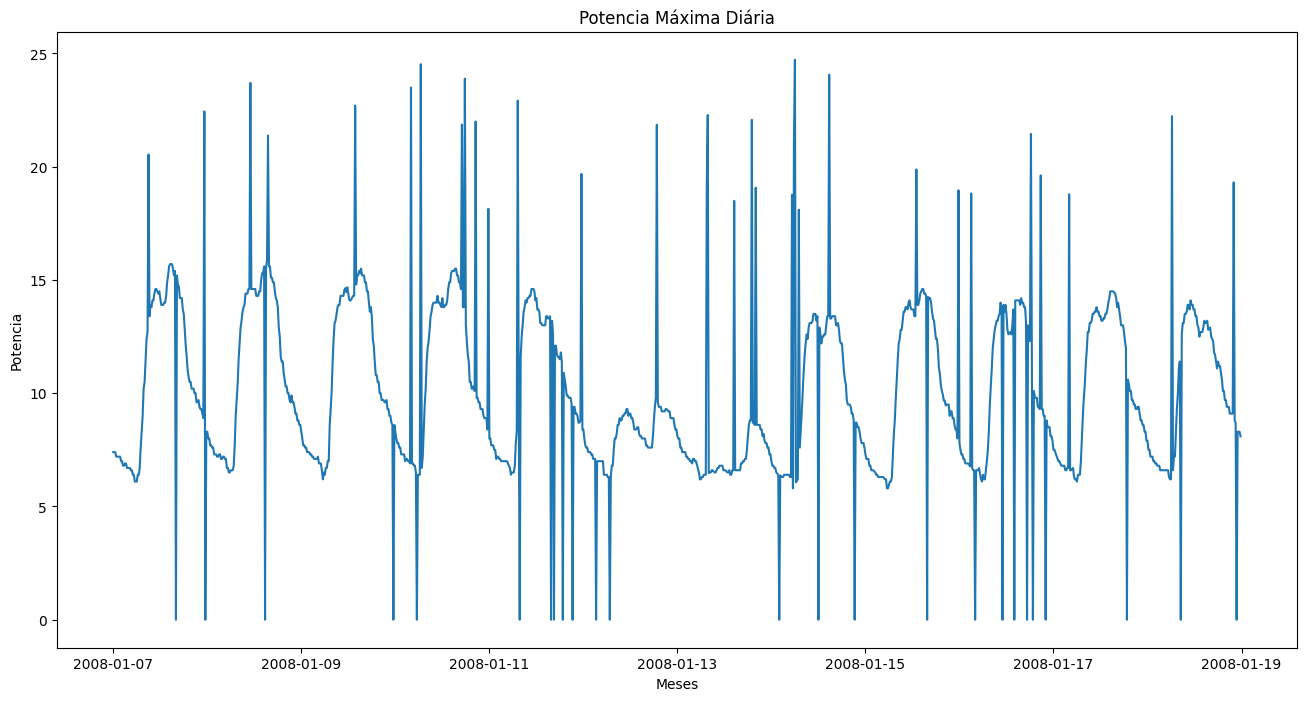

In [14]:
plt.figure(figsize=(16,8))
plt.title('Potencia Máxima Diária')
#plt.yticks([0,18])

plt.xlabel('Meses')
plt.ylabel('Potencia')
plt.plot(df_max1)

### Usando o método do cotovelo determinar o número ótimo de cluster para este conjunto de dados

In [15]:
potencia_array_2008 = df_max_2008.values.reshape(-1, 1)
potencia_array_2008

array([[7.9000001 ],
       [7.69999981],
       [7.69999981],
       ...,
       [8.39999962],
       [8.30000019],
       [8.        ]])

In [61]:
X = potencia_array_2008
inertia = []

# Teste o número de clusters de 1 a 10 (você pode ajustar esse intervalo)
for i in range(1, 5):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)



C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

Text(0, 0.5, 'Inércia')

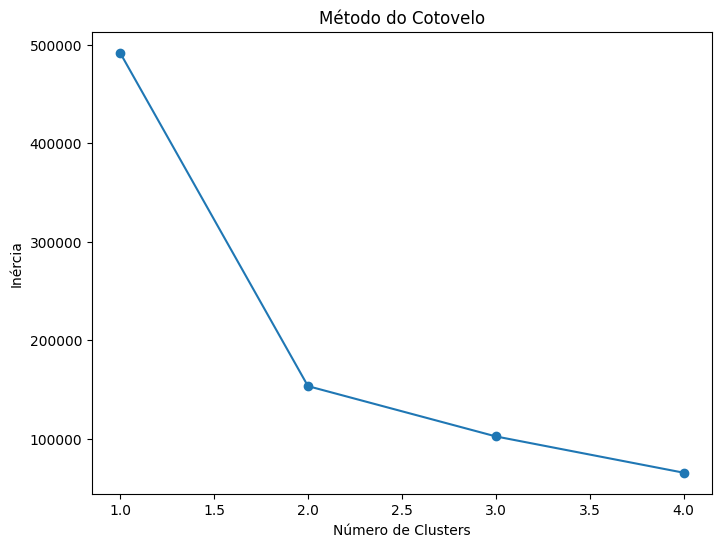

In [62]:
# Plote da curva de cotovelo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 5), inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')

In [63]:
df_2008 = df_max_2008.to_frame()

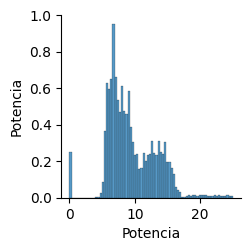

In [64]:
sb.pairplot(df_2008)

C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


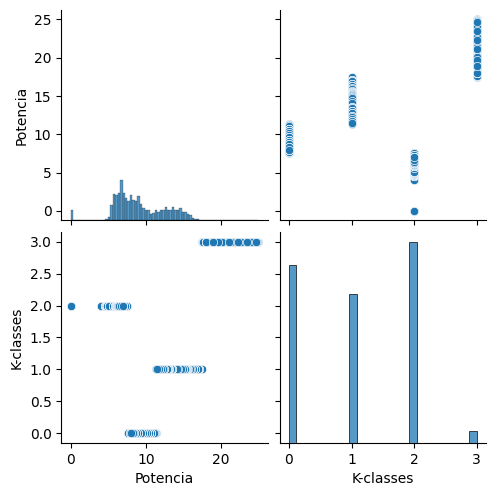

In [65]:
P = np.array(df_2008) 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(P)
kmeans.labels_

#centros dos clusters  [Centro  K-Classes]
#Neste caso o Centro=0, fornece como classe=3
#Portanto, deve filtrar posteriormente a classe 3 para extrair os outliers
kmeans.cluster_centers_

centroides=kmeans.cluster_centers_
#Pegando os labels(clusters) e colocando ao Dataframe df2
df_2008['K-classes'] = kmeans.labels_
df_2008.head()
sb.pairplot(df_2008)

In [68]:
centroides

array([[ 9.04751062],
       [13.71377472],
       [ 6.11428221],
       [21.21318918]])

In [70]:
Classe_Zero = np.argmin(centroides)
Classe_Zero   

2

In [71]:
Classe_Picos = np.argmax(centroides)
Classe_Picos 

3

In [72]:
#Filtrando Elementos com a classe que contem os ZEROS ou PROXIMOS DO ZERO
df_2008[df_2008['K-classes']==Classe_Zero]

,Potencia,K-classes
Data,,
2008-01-01 00:45:00,7.4,2
2008-01-01 01:00:00,7.4,2
2008-01-01 01:15:00,0.0,2
2008-01-01 01:30:00,7.4,2
2008-01-01 01:45:00,7.2,2
...,...,...
2008-12-31 07:00:00,6.7,2
2008-12-31 07:15:00,7.0,2
2008-12-31 10:15:00,0.0,2


In [74]:
#Filtrando Elementos com a classe que contem os PICOS POSITIVOS
df_2008[df_2008['K-classes']==Classe_Picos ]

,Potencia,K-classes
Data,,
2008-01-03 14:30:00,21.181425,3
2008-01-04 17:30:00,18.722269,3
2008-01-05 03:00:00,19.475842,3
2008-01-05 04:15:00,20.078304,3
2008-01-05 05:15:00,24.465921,3
...,...,...
2008-12-27 21:00:00,24.696054,3
2008-12-28 04:45:00,19.670459,3
2008-12-29 10:45:00,21.086532,3


# Métricas de avaliação do método de clusterização

In [75]:
k = 4  # Número de clusters desejado
kmeans = KMeans(n_clusters=k)
kmeans.fit(df_2008)

C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [76]:
labels = kmeans.labels_

#### Silhouette Score: O coeficiente de silhueta mede o quão bem os objetos estão agrupados em seus clusters. Um valor próximo de 1 indica que os objetos estão bem agrupados, enquanto um valor próximo de -1 indica que os objetos estão agrupados de forma inadequada. Um valor próximo de 0 significa que os clusters estão no caminho certo.

In [77]:
silhouette_avg = silhouette_score(df_2008, labels)


#### Calinski-Harabasz Index: O índice Calinski-Harabasz (também chamado de critério de variação entre clusters sobre a variação intracluster) mede a relação entre a dispersão média entre os clusters e a dispersão média dentro dos clusters. Valores mais altos do índice indicam clusters mais compactos e separados. Um índice Calinski-Harabasz maior é geralmente desejado, isso é um bom sinal de que a clusterização está separando efetivamente os dados em grupos distintos. 

In [ ]:
calinski_harabasz = calinski_harabasz_score(df_2008, labels)

In [78]:
print(f'Silhouette Score: {silhouette_avg}')
print(f'Calinski-Harabasz Index: {calinski_harabasz}')


Silhouette Score: 0.6502271847280747
Calinski-Harabasz Index: 81442.82107986885
